In [1]:
!curl -L -o noahs_utils.py https://gist.github.com/bantucaravan/1956003e25c056c550a088542b41dc91/raw/noahs_utility_funcs.py

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 11663  100 11663    0     0  36427      0 --:--:-- --:--:-- --:--:-- 36427


In [1]:
import os
import glob
import re
import datetime as dt
from collections import defaultdict
import sys
import importlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report

#import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, DirectoryIterator
from tensorflow.keras.callbacks import ModelCheckpoint#, TensorBoard
from tensorflow.keras.layers import Dropout, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing import image

from noahs_utils import *
from proj_utils import *

In [6]:
def model_from_uuid(uuid, opt='max'):

    get_loss = lambda x: float(re.findall(r'_(\d\.\d+)_', x)[0])
    #opt_idx = -1 if 'accuracy' in bestmodelpath else 0 # choose first of last depending acc or loss
    if opt=='max':
        opt_idx = -1
    pat = '../saved models/model_epoch*_*_%s.h5' %(uuid)
    bestmodelpath = sorted(glob.glob(pat), key=get_loss)[opt_idx]
    print(bestmodelpath)
    return bestmodelpath

In [48]:

def predict_img(img_path, IMG_SHAPE=(150, 150)):

    img = image.load_img(img_path, target_size=IMG_SHAPE)
    img = image.img_to_array(img, dtype=np.uint8)
    print(img.shape)
    img=np.array(img)/255.0
    plt.title("Loaded Image")
    plt.axis('off')
    plt.imshow(img.squeeze())
    plt.show()
    b = img[np.newaxis, ...]
    #print(b.shape) # batch size
    p = model.predict(b)
    p = p.squeeze()
    i = np.argmax(p)
    print("Predicted Class:", labels[i], round(p[i],3))
    c = {labels[i]:np.round(s*100,3) for i, s in enumerate(p)}
    print(pd.Series(c))
    




In [ ]:
logpath = '../logs/model_log.json'
log = read_log_df(path=logpath)
cols = ['run_id', 'metrics_report.weighted avg.recall', 'EPOCH', 'MODEL', 'OPT']
allcols(log.sort_values('metrics_report.accuracy.support', ascending=False).loc[:, cols].head(20))s

### Predict from web dowloaded images

In [7]:
ts = '2020-02-09_21h53m57s'
path = model_from_uuid(ts)
model = load_model(path)

../saved models/model_epoch45_0.860_2020-02-09_21h53m57s.h5


In [46]:
img_pat = '../data/test images/*.*'
#img_pat = '../data/test images/insample/*'
a = glob.glob(img_pat)
img_path = a[0]

labels = list({'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}.keys())


(150, 150, 3)


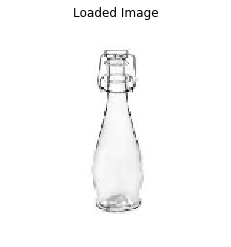

Predicted Class: glass 0.827
cardboard     0.298
glass        82.745
metal         0.216
paper        14.904
plastic       1.658
trash         0.179
dtype: float64
(150, 150, 3)


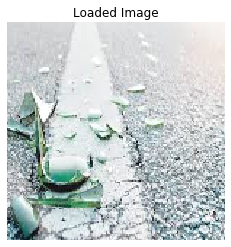

Predicted Class: paper 0.552
cardboard    33.616
glass         0.084
metal         0.318
paper        55.189
plastic       0.299
trash        10.494
dtype: float64
(150, 150, 3)


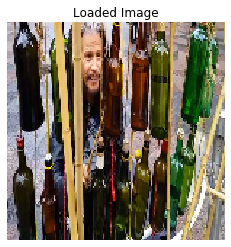

Predicted Class: paper 1.0
cardboard      0.0
glass          0.0
metal          0.0
paper        100.0
plastic        0.0
trash          0.0
dtype: float64
(150, 150, 3)


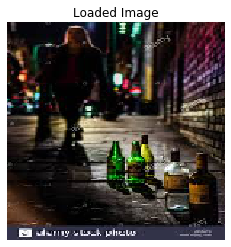

Predicted Class: paper 0.855
cardboard     1.917
glass         2.114
metal         8.342
paper        85.457
plastic       2.016
trash         0.153
dtype: float64


In [49]:
for i in a:
    predict_img(i)

In [21]:
p

array([[0.336159  , 0.00084253, 0.00318028, 0.55188763, 0.00298961,
        0.10494092]], dtype=float32)